<a href="https://colab.research.google.com/github/kshitij2105/About-Me/blob/main/pr1_FFNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf    #https://www.youtube.com/watch?v=_c_x8A3mNDk

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data=tf.keras.datasets.mnist
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test)=data.load_data()   # x is attribute and y is classes

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_test.shape        # show the data set of test 28 pixel , 28 pixel   picture

(10000, 28, 28)

In [7]:
x_train.shape    # show the data set of training   28 pixel , 28 pixel   picture
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1.
# The simplest way is to divide the value of every pixel by 255 to get the values in the range of 0 to 1

In [8]:
x_train,x_test =x_train/255,x_test/255      # Covert all values between 0 to 1

In [9]:
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),      # covert 2D into  1D
tf.keras.layers.Dense(150,activation='relu'),      #  Dense Means Fully connected Network in Hiden Layer
tf.keras.layers.Dense(10,activation='softmax')     # classifying into 10 classes output have TEN neuron
])

In [10]:
# The default learning rate is 0.01 and no momentum is used by default.
sgd=SGD(0.02)    # is learning rate  0.02
#adam
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#

In [11]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=5) # Train the model


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6512 - accuracy: 0.8371 - val_loss: 0.3517 - val_accuracy: 0.9043
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3335 - accuracy: 0.9071 - val_loss: 0.2879 - val_accuracy: 0.9197
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.9199 - val_loss: 0.2572 - val_accuracy: 0.9279
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2537 - accuracy: 0.9285 - val_loss: 0.2314 - val_accuracy: 0.9357
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2311 - accuracy: 0.9353 - val_loss: 0.2154 - val_accuracy: 0.9395


In [12]:
# Evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2154 - accuracy: 0.9395


313/313 [==============================] - 1s 2ms/step
4


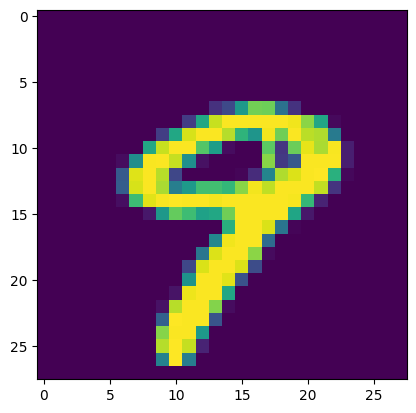

In [19]:
plt.imshow(x_test[9])
prediction=model.predict(x_test)   #predict the data
print(np.argmax(prediction[4]))   # print data depend on max probaiblites
#plt.show()

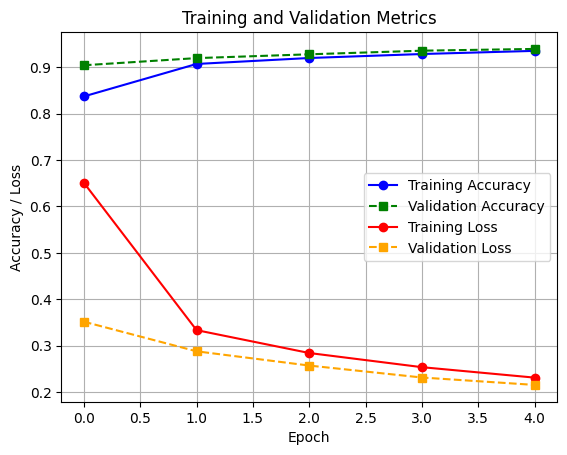

In [26]:


plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='green', marker='s')


plt.plot(history.history['loss'], label='Training Loss', linestyle='-', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='orange', marker='s')


plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')


plt.legend()

plt.grid(True)


plt.show()
